In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style = "whitegrid", palette = "pastel")
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score

In [5]:
import warnings
warnings.filterwarnings('ignore')

## **Data Exploration & Understanding**

In [6]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [7]:
train_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


## Data Dictionary

| Column Name     | Description                |
| --------------- | -------------------------------------------------------------------- |
| **PassengerId** | Unique identifier for each passenger.        
| **Survived**    | Survival indicator (0 = Did not survive, 1 = Survived).        
| **Pclass**      | Passenger’s ticket class (1 = Upper, 2 = Middle, 3 = Lower).         |
| **Name**        | Passenger’s full name (includes title such as Mr., Mrs., etc.).      |
| **Sex**         | Passenger’s gender (male/female).    
| **Age**         | Passenger’s age in years. Missing for some passengers.       
| **SibSp**       | Number of siblings or spouses aboard the Titanic.          
| **Parch**       | Number of parents or children aboard the Titanic.          
| **Ticket**      | Ticket number.             |
| **Fare**        | Amount paid for the ticket.           
| **Cabin**       | Cabin number where the passenger stayed (many missing values).       |
| **Embarked**    | Some missing (≈2) | String (C, Q, S)    | Port of embarkation: C = Cherbourg, Q = Queenstown, S = Southampton. |

In [6]:
train_data.shape

(891, 12)

In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [9]:
train_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

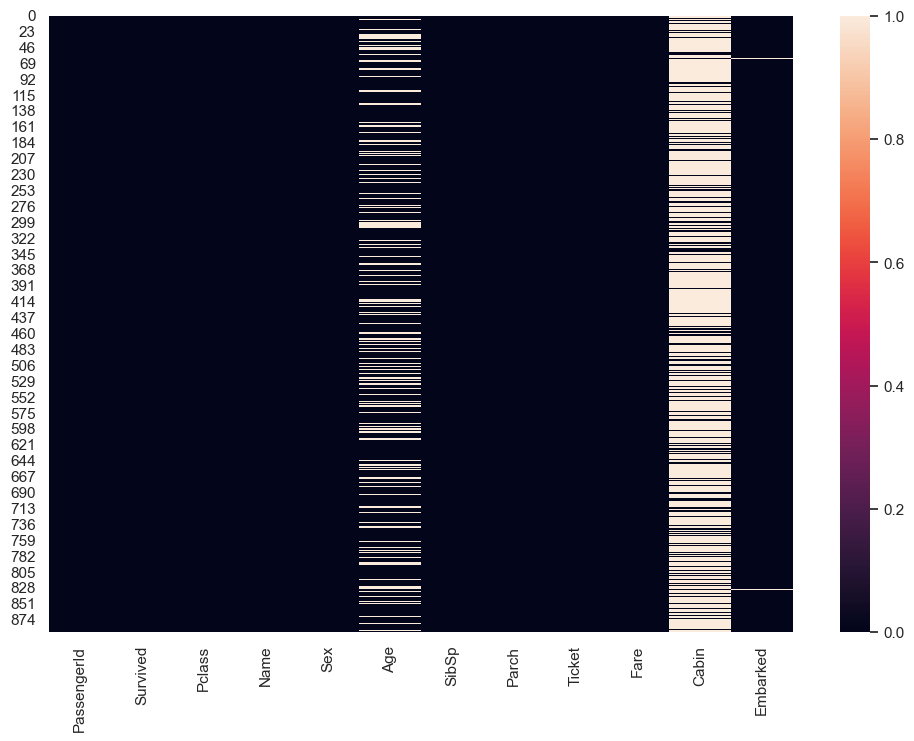

In [4]:
plt.figure(figsize = (12, 8))
sns.heatmap(train_data.isna())
plt.show()

In [13]:
train_data.duplicated().sum()

np.int64(0)

## **Data Cleaning & Preprocessing** 

## Handling Missing Values 

In [8]:
train_data['Age'].fillna(train_data['Age'].mean(), inplace = True)

`Cabin` column has many missing values, so the best technique is to drop it.

In [9]:
train_data.drop('Cabin', axis = 1, inplace = True)

In [10]:
train_data['Embarked'].fillna(train_data['Embarked'].mode()[0], inplace = True)

In [11]:
train_data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

## Feature Engineering 

`FamilySize` = `SibSp` + `Parch` + 1

In [12]:
train_data['FamilySize'] = train_data['SibSp'] + train_data['Parch'] + 1

In [13]:
train_data['Family'] = (train_data['FamilySize'] > 1).astype(int)

## Dropping Unnecessary Columns

In [14]:
train_data.drop(['Ticket', 'Name', 'PassengerId'], axis = 1, inplace = True)

## Encoding Categorical Features

In [15]:
categorical_cols = train_data.select_dtypes(include = ['object']).columns

# loop through each categorical column
for col in categorical_cols:
    print(f"Column: {col}")
    print(train_data[col].unique())   
    print("-" * 50)

Column: Sex
['male' 'female']
--------------------------------------------------
Column: Embarked
['S' 'C' 'Q']
--------------------------------------------------


In [16]:
for col in train_data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    train_data[col] = le.fit_transform(train_data[col].astype(str))

In [17]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Sex         891 non-null    int64  
 3   Age         891 non-null    float64
 4   SibSp       891 non-null    int64  
 5   Parch       891 non-null    int64  
 6   Fare        891 non-null    float64
 7   Embarked    891 non-null    int64  
 8   FamilySize  891 non-null    int64  
 9   Family      891 non-null    int64  
dtypes: float64(2), int64(8)
memory usage: 69.7 KB


## **Exploratory Data Analysis (EDA)**

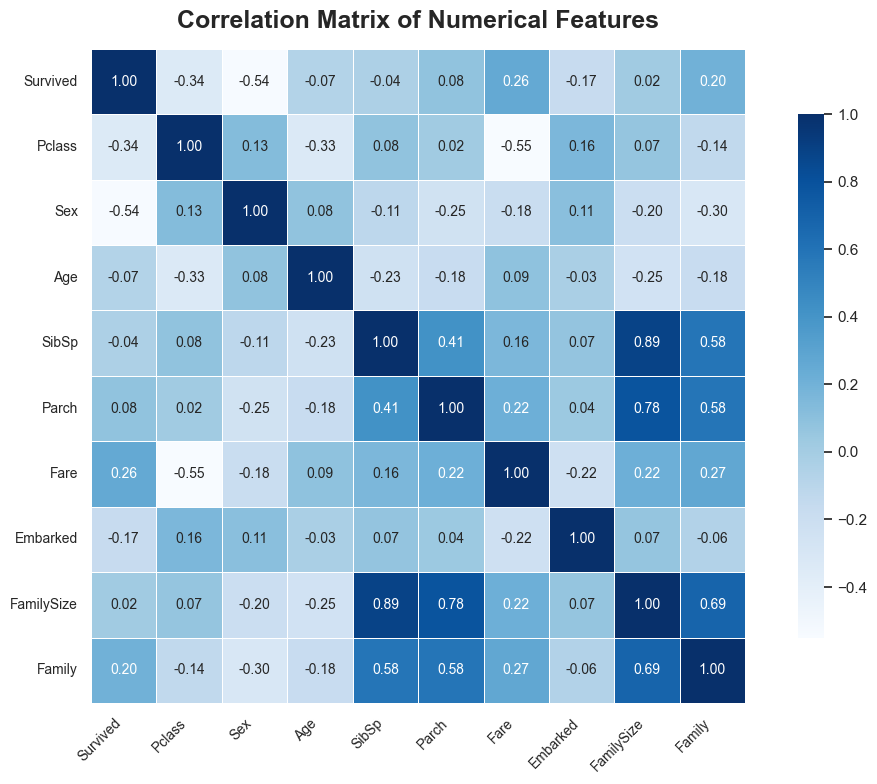

In [16]:
numeric_df = train_data.select_dtypes(include=['float64', 'int64'])
corr = numeric_df.corr()
plt.figure(figsize=(11, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='Blues', square=True, 
            linewidths=0.5, cbar_kws={"shrink": 0.8}, annot_kws={"size": 10})

plt.title("Correlation Matrix of Numerical Features", fontsize=18, fontweight='bold', pad=15)
plt.xticks(rotation=45, fontsize=10, ha='right')
plt.yticks(rotation=0, fontsize=10)
plt.tight_layout()
plt.show()

1. Survived
    - With Pclass: -0.34 → passengers in 1st class (lower Pclass value) had higher chances of survival → makes sense.
    - With Fare: 0.26 → the more expensive the ticket, the higher the survival chances (wealthier passengers had better cabins and access to lifeboats).
    - With Family: 0.20 → small families slightly increased survival chances.
2. Pclass
    - With Fare: -0.55 → strong negative relationship: 1st class passengers paid much more than 3rd class passengers.
    - With Age: -0.33 → younger passengers tended to be more in lower classes.
3. Age
    - Very weak correlation with survival (-0.07) → age wasn’t a strong factor in survival.
4. SibSp (siblings/spouses) & Parch (parents/children)
    - Correlation between them: 0.41 → passengers with siblings/spouses often also had parents/children aboard.
    - SibSp with FamilySize: 0.89 → very strong since FamilySize is derived from them.
    - Parch with FamilySize: 0.78 → same reason.
5. Fare
    - Correlated with survival (0.26) → higher fare meant better chances of survival.
    - Correlated with Family (0.27) → families often bought more expensive/group tickets.
6. FamilySize & Family
    - Strong correlation (0.69) → both measure family size in similar ways.
    - FamilySize strongly correlated with SibSp (0.89) and Parch (0.78) → because it’s calculated from them.
passengers came from **Southampton (S)**. 
7. Embarked (Port of Embarkation)
    - Weak negative correlation with Survived (-0.17).
    - Weak positive correlation with Pclass (+0.16).
    - Certain ports were associated with higher-class passengers.
8. Sex
    - Strong negative correlation with Survived (-0.54) → survival strongly depended on gender (females > males).
    - Negative correlation with Family (-0.30) → males were more likely to travel alone or with smaller families.

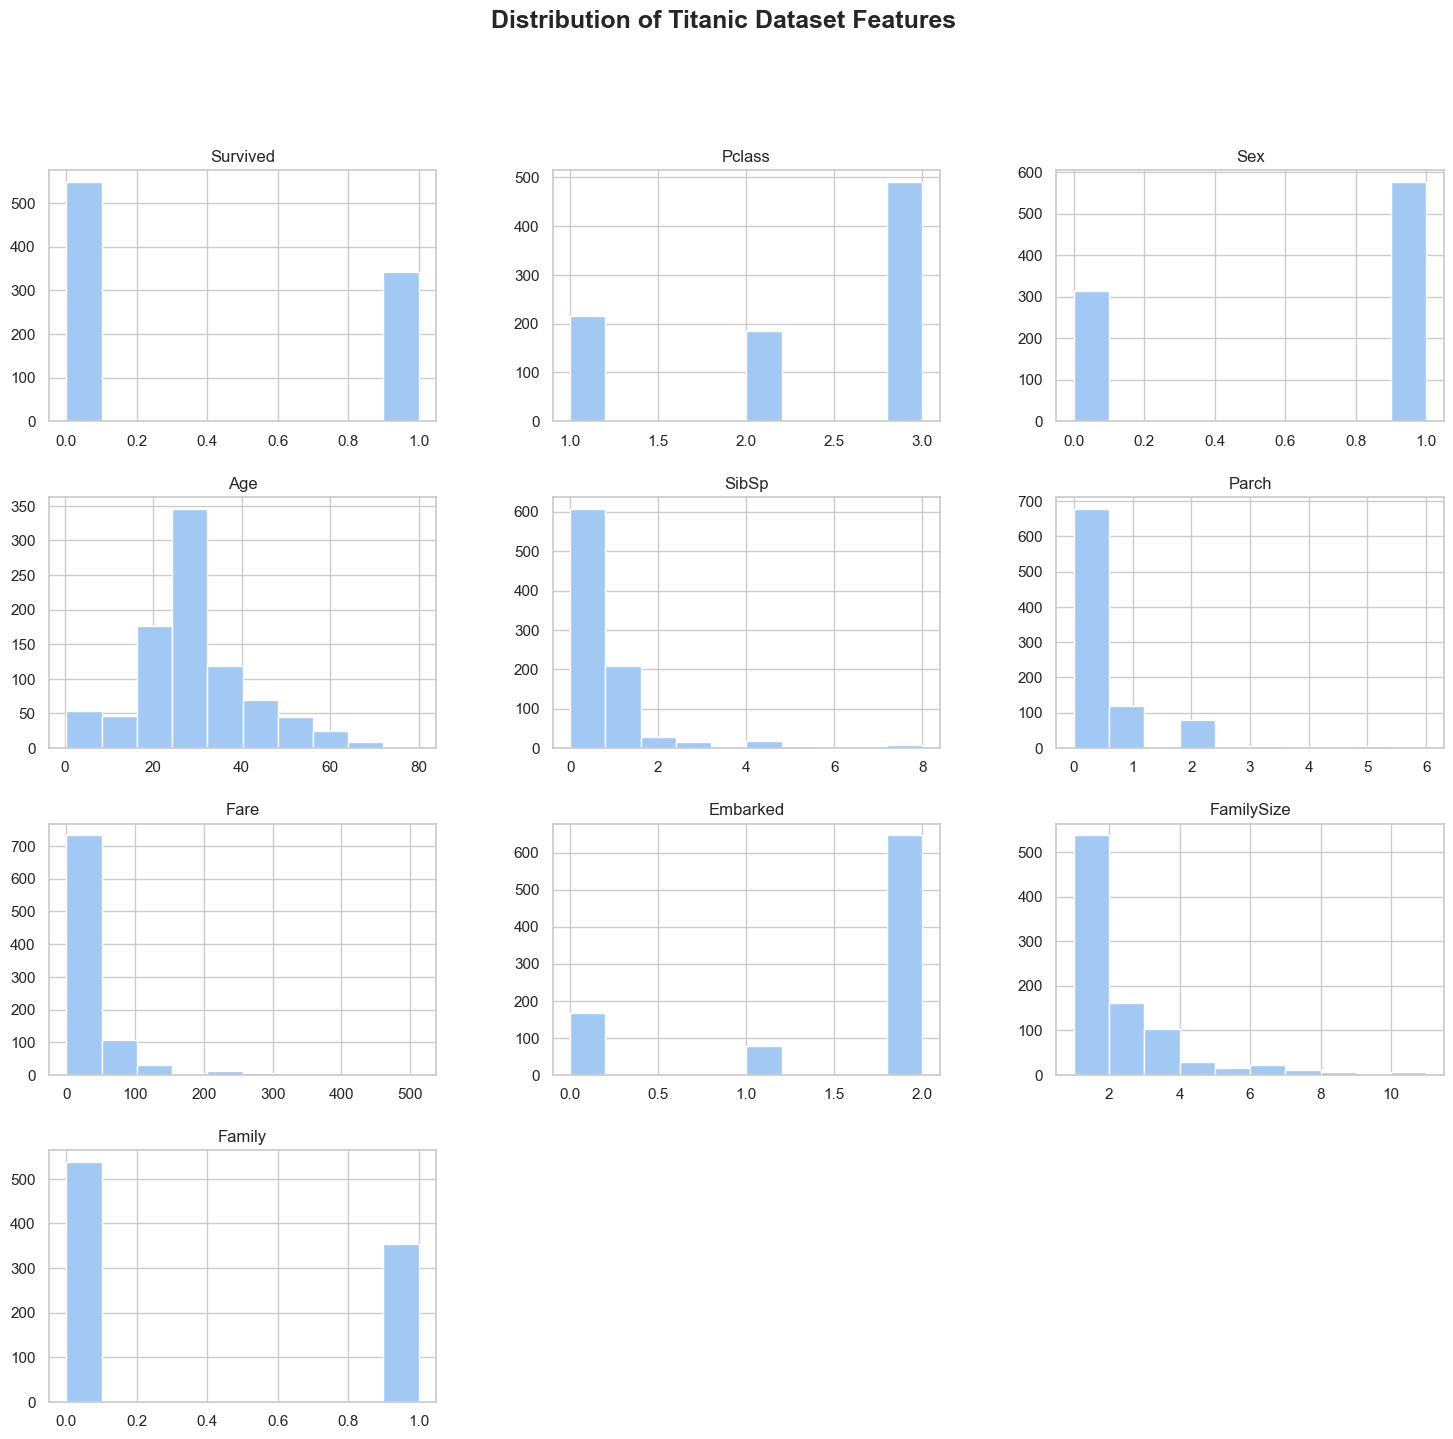

In [17]:
train_data.hist(figsize = (18, 16))
plt.suptitle('Distribution of Titanic Dataset Features', fontsize=18, fontweight='bold')
plt.show()

This figure shows histograms for each numerical feature in the Titanic dataset. Here’s what we can learn:
1. Survived
   - Two bars: `0 = did not survive`, `1 = survived`.  
   - More people died (~550) than survived (~340).  
   - **Insight**: The dataset is **imbalanced** (more deaths than survivors).  
2. Pclass (Passenger Class)
   - Most passengers were in **3rd class (~500)**.  
   - Fewer in 1st (~200) and 2nd (~180).  
   - **Insight**: Strong class imbalance, which is linked to survival chances.  
3. Age
   - Distribution is roughly bell-shaped, centered around **20–30 years old**.  
   - Very few very young children (<5) or elderly (>70).  
   - **Insight**: Most passengers were young adults.  
4. SibSp (Siblings/Spouses Aboard)
   - Majority have `0` (~600).  
   - Smaller counts with `1` or `2`, very few above `3`.  
   - **Insight**: Most passengers traveled without siblings/spouses.  
5. Parch (Parents/Children Aboard)
   - Most have `0` (~700).  
   - A few with `1` or `2`. Almost none above `3`.  
   - **Insight**: Most traveled without parents/children.  
6. Fare
   - Very skewed distribution → most fares were **cheap (<100)**.  
   - A few extreme outliers (>200, up to ~500).  
   - **Insight**: Apply **log transformation** to normalize for modeling.  
7. FamilySize
   - Most have a family size of `1` (just themselves).  
   - Smaller counts for family sizes of 2–4, very few above 5.  
   - **Insight**: Most passengers were **solo travelers or in small families**.  
8. Family (Binary Flag)
   - Two groups:  
     - ~550 had **no family aboard**.  
     - ~350 had **family aboard**.  
   - **Insight**: About 40% of passengers had family on board.
9. Sex (Categorical Feature)
   - Two values: `male`, `female`.  
   - Majority were **male**.  
   - **Insight**: Survival strongly depends on sex → females had much higher survival rates than males (“women and   children first”).  
10. Embarked (Port of Embarkation)
- Three values:  
  - `S` = Southampton (majority)  
  - `C` = Cherbourg  
  - `Q` = Queenstown  
- **Insight**: Most passengers embarked from **Southampton (S)**. Embarkation location may relate to survival via class/ticket price.  
# Key Takeaways
1. **Imbalances** in the data:  
   - More people died than survived.  
   - More passengers in 3rd class than 1st/2nd.  
   - Most passengers traveled alone (no SibSp, no Parch).  

2. **Skewed features**:  
   - `Fare` is highly skewed → needs transformation.  
   - `FamilySize` is skewed → binning or capping might help. 

4. **Age** is fairly normal but survival might depend on **specific groups** (children vs adults).  

## Relationships between the variables and the Target (Survived)

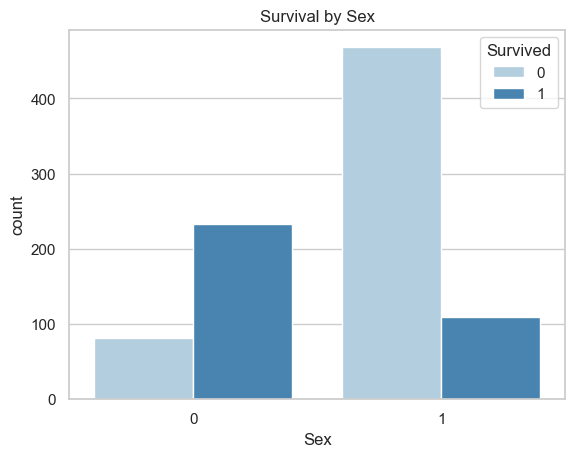

In [19]:
sns.countplot(x='Sex', hue='Survived', data = train_data, palette = "Blues")
plt.title('Survival by Sex')
plt.show()

**Sex vs Survived**    
- Women had a much higher survival rate than men.    
- Reason: “Women and children first” policy during evacuation.    
- Takeaway: Sex is one of the strongest predictors of survival.    

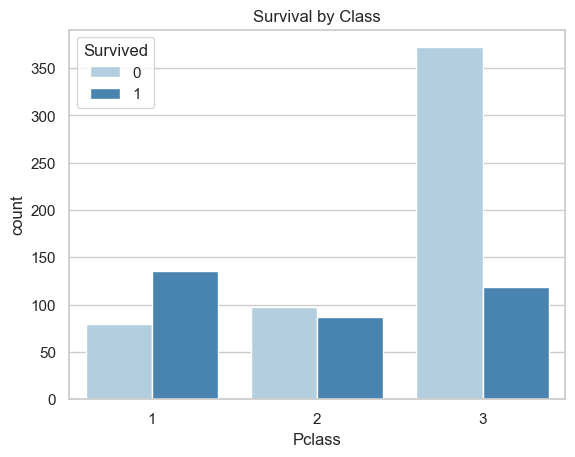

In [20]:
sns.countplot(x='Pclass', hue='Survived', data=train_data, palette = "Blues")
plt.title('Survival by Class')
plt.show()

**Pclass vs Survived**   
- 1st-class passengers had the highest survival rate.   
- 3rd-class passengers had the lowest survival rate.    
- Reason: cabin location, easier access to lifeboats, and socio-economic status.    

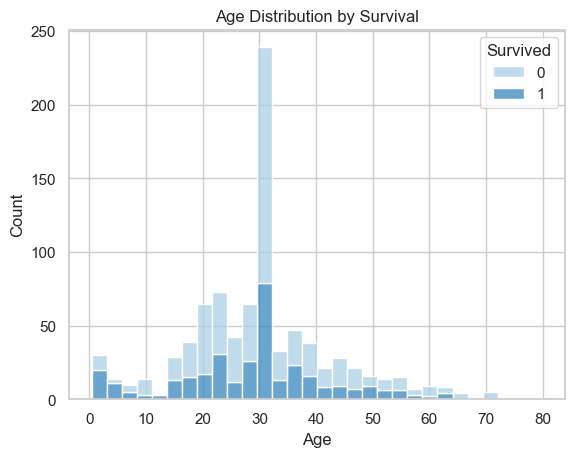

In [21]:
sns.histplot(data=train_data, x='Age', hue='Survived', multiple='stack', bins=30, palette = "Blues")
plt.title('Age Distribution by Survival')
plt.show()

**Age vs Survived**
- Children (younger ages) had higher survival rates.
- As age increases, survival rate generally drops.
- Reason: priority was given to children.

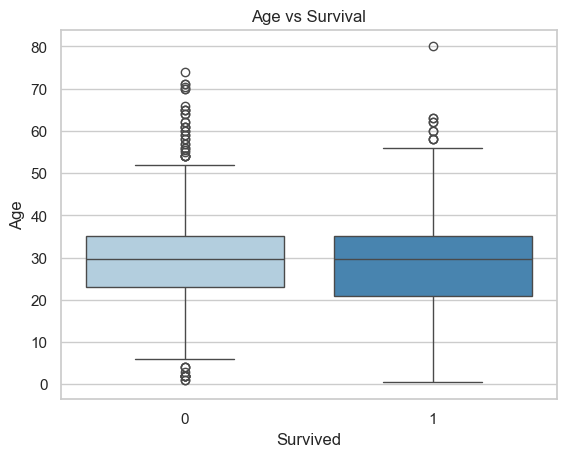

In [30]:
sns.boxplot(x='Survived', y='Age', data=train_data, palette = "Blues")
plt.title('Age vs Survival')
plt.show()

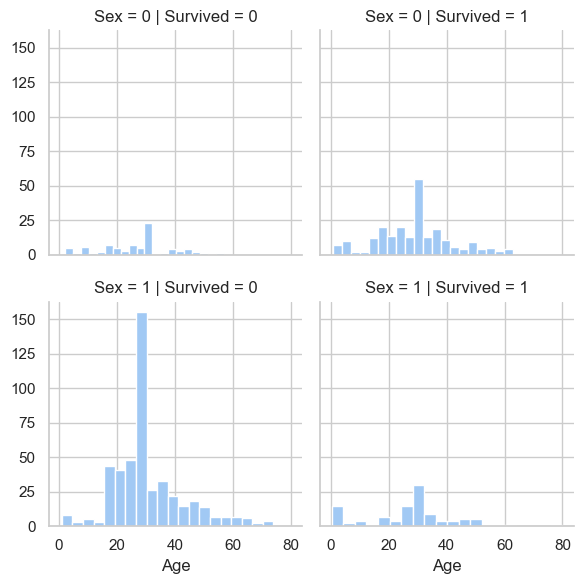

In [35]:
g = sns.FacetGrid(train_data, col='Survived', row='Sex')
g.map(plt.hist, 'Age', bins=20)
plt.show()

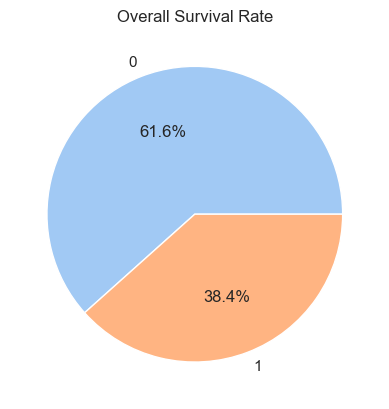

In [ ]:
train_data['Survived'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Overall Survival Rate')
plt.ylabel('')
plt.show()

## **Model Implementation and Evaluation**

## Spliting My Own Training Data Into Train and Test To choose the Best Model 

In [19]:
X = train_data.drop('Survived', axis = 1).values
y = train_data['Survived'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, train_size = .8)

In [20]:
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

X_train: (712, 9)
X_test: (179, 9)
y_train: (712,)
y_test: (179,)


## Standardizing Features

In [21]:
Sc_X = StandardScaler()
X_train = Sc_X.fit_transform(X_train)
X_test = Sc_X.transform(X_test)

## Logistic Regression Model 

In [22]:
logistic = LogisticRegression(random_state = 0)
logistic.fit(X_train, y_train)
y_pred = logistic.predict(X_test)

In [23]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

Accuracy: 0.7988826815642458

Confusion Matrix:
 [[92 18]
 [18 51]]

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.84      0.84       110
           1       0.74      0.74      0.74        69

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



In [24]:
print(f"Training Accuracy: {accuracy_score(y_train, logistic.predict(X_train))}")
print(f"Testing Accuracy: {accuracy_score(y_test, logistic.predict(X_test))}")

Training Accuracy: 0.8019662921348315
Testing Accuracy: 0.7988826815642458


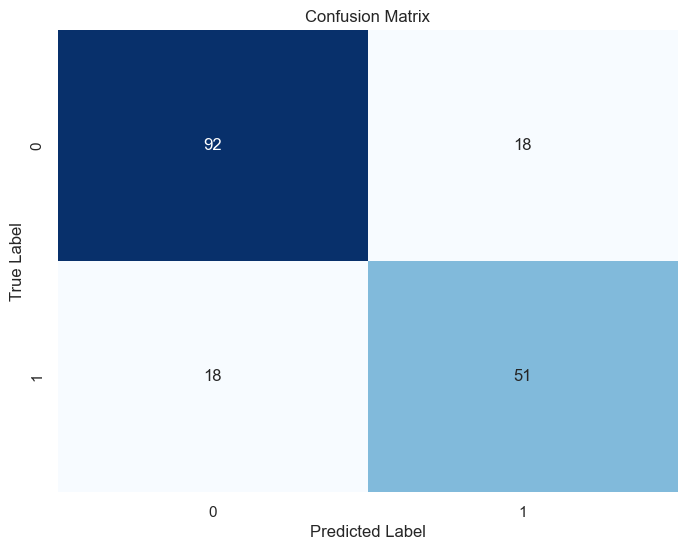

In [25]:
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar = False)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

The model has balanced performance on both classes (precision and recall similar for 0 and 1).   
It’s slightly better at predicting non-survivors (class 0) than survivors (class 1) — 84% vs 74%.    
About 18 survivors are missed (false negatives) and 18 non-survivors are incorrectly predicted as survivors (false positives).      
Overall 80% accuracy is a solid baseline for Titanic; many public notebooks score around 0.78–0.81 on validation.    

## Support Vector Classification Model (SVC)

In [26]:
svc = SVC(probability = True, kernel = 'poly', random_state = 0)
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

In [27]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

Accuracy: 0.7988826815642458

Confusion Matrix:
 [[96 14]
 [22 47]]

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.87      0.84       110
           1       0.77      0.68      0.72        69

    accuracy                           0.80       179
   macro avg       0.79      0.78      0.78       179
weighted avg       0.80      0.80      0.80       179



In [28]:
print(f"Training Accuracy: {accuracy_score(y_train, svc.predict(X_train))}")
print(f"Testing Accuracy: {accuracy_score(y_test, svc.predict(X_test))}")

Training Accuracy: 0.8370786516853933
Testing Accuracy: 0.7988826815642458


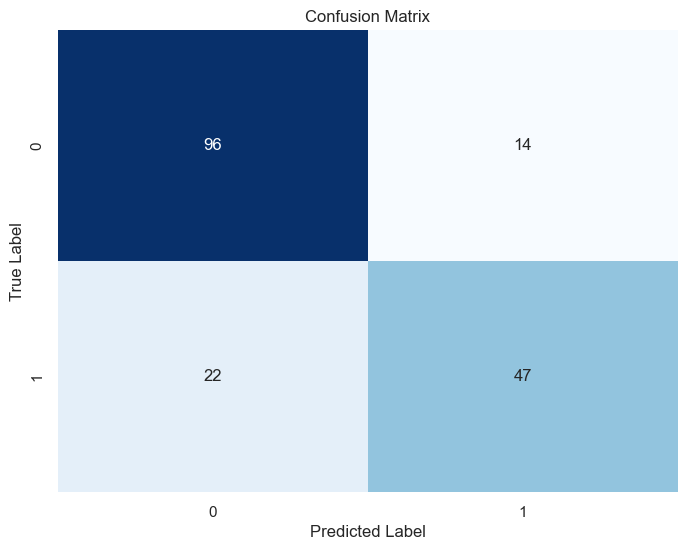

In [29]:
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar = False)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

## Random Forest Model

In [30]:
RF = RandomForestClassifier(n_estimators = 100, random_state = 0, criterion = 'entropy', max_depth = 5)
RF.fit(X_train, y_train)
y_pred = RF.predict(X_test)

In [31]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

Accuracy: 0.8379888268156425

Confusion Matrix:
 [[102   8]
 [ 21  48]]

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.93      0.88       110
           1       0.86      0.70      0.77        69

    accuracy                           0.84       179
   macro avg       0.84      0.81      0.82       179
weighted avg       0.84      0.84      0.83       179



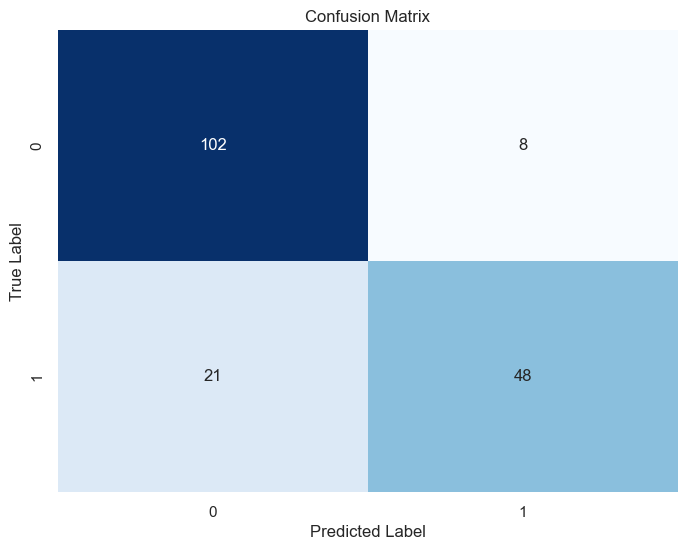

In [32]:
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar = False)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [33]:
print(f"Training Accuracy: {accuracy_score(y_train, RF.predict(X_train))}")
print(f"Testing Accuracy: {accuracy_score(y_test, RF.predict(X_test))}")

Training Accuracy: 0.8497191011235955
Testing Accuracy: 0.8379888268156425


After evaluating Logistic Regression, Support Vector Classifier (SVC), and Random Forest on the same validation set, the Random Forest model delivered the strongest performance. It achieved an overall accuracy of about 84%, compared with roughly 80% for both Logistic Regression and the updated SVC. Random Forest also produced the highest precision for predicting survivors (0.84 versus 0.77 for SVC and 0.74 for Logistic Regression) and matched Logistic Regression’s recall (0.74), outperforming SVC’s recall (0.68). This means that the Random Forest model not only identifies a larger proportion of actual survivors than SVC but also makes fewer incorrect “survived” predictions than either of the other models. Overall, Random Forest demonstrates the best balance between sensitivity to survivors and specificity to non-survivors, making it the most effective of the three models for this dataset.

In [34]:
from sklearn.ensemble import VotingClassifier

voting = VotingClassifier(estimators=[
    ('rf', RF),
    ('svc', svc),
    ('log', logistic)
], voting='soft')

voting.fit(X_train, y_train)

,estimators,"[('rf', ...), ('svc', ...), ...]"
,voting,'soft'
,weights,None
,n_jobs,None
,flatten_transform,True
,verbose,False
,n_estimators,100
,criterion,'entropy'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,1


In [35]:
y_pred = voting.predict(X_test)

In [36]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

Accuracy: 0.8100558659217877

Confusion Matrix:
 [[97 13]
 [21 48]]

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.88      0.85       110
           1       0.79      0.70      0.74        69

    accuracy                           0.81       179
   macro avg       0.80      0.79      0.79       179
weighted avg       0.81      0.81      0.81       179



## Random Forest still edges out the ensemble

## KNN Model

In [37]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [38]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

Accuracy: 0.8156424581005587

Confusion Matrix:
 [[95 15]
 [18 51]]

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.86      0.85       110
           1       0.77      0.74      0.76        69

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.82      0.81       179



## Random Forest still the BEST

## Applying Preprocessing Steps on Test File

In [ ]:
test_data['FamilySize'] = test_data['SibSp'] + test_data['Parch'] + 1
test_data['Family'] = (test_data['FamilySize'] > 1).astype(int)

test_data.drop(['Ticket', 'Name', 'PassengerId'], axis = 1, inplace = True)

for col in test_data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    test_data[col] = le.fit_transform(test_data[col].astype(str))
    
test_data['Age'].fillna(train_data['Age'].mean(), inplace = True)
test_data.drop('Cabin', axis = 1, inplace = True)
test_data['Embarked'].fillna(train_data['Embarked'].mode()[0], inplace = True)

In [46]:
X_train = train_data.drop('Survived', axis = 1).values
y_train = train_data['Survived'].values
X_test = test_data.values

In [47]:
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)

X_train: (891, 9)
X_test: (418, 9)
y_train: (891,)


In [48]:
Sc_X = StandardScaler()
X_train = Sc_X.fit_transform(X_train)
X_test = Sc_X.transform(X_test)

In [50]:
RF = RandomForestClassifier(n_estimators = 100, random_state = 0, criterion = 'entropy', max_depth = 5)
RF.fit(X_train, y_train)
y_pred = RF.predict(X_test)

In [52]:
original = pd.read_csv('test.csv')

In [53]:
submission = pd.DataFrame({
    'PassengerId': original['PassengerId'],
    'Survived': y_pred
})

In [54]:
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [55]:
submission.to_csv('submission.csv', index=False)